# **Importing Libraries**

In [1]:
!pip -q install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import time


from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# **Dataset Loading**

In [3]:
def load_and_process_image(image_path):
    img = load_img(image_path)
    # convert image to array
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

In [4]:
def deprocess(img):
    # perform the inverse of the pre processing step
    img[:, :, 0] += 103.939
    img[:, :, 1] += 116.779
    img[:, :, 2] += 123.68
    # convert RGB to BGR
    img = img[:, :, ::-1]

    img = np.clip(img, 0, 255).astype('uint8')
    return img


def display_image(image):
    # remove one dimension if image has 4 dimension
    if len(image.shape) == 4:
        img = np.squeeze(image, axis=0)

    img = deprocess(img)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    return

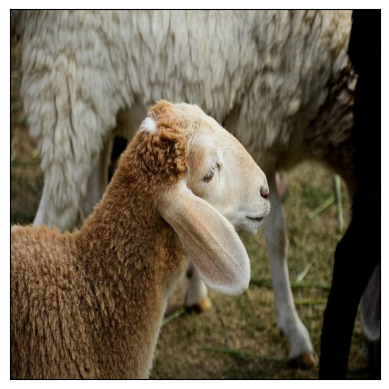

In [5]:
content_img_path='/content/content1.jpg'
content_img = load_and_process_image(content_img_path)
display_image(content_img)

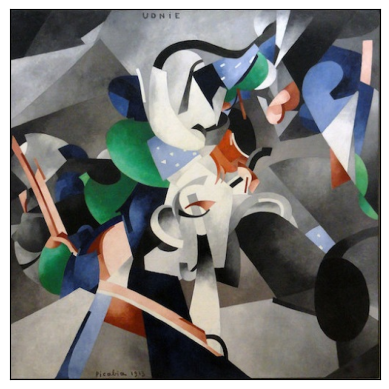

In [6]:
style_img_path='/content/style1.jpg'
style_img = load_and_process_image(style_img_path)
display_image(style_img)

# **VGG-19 Model**

In [7]:
model = VGG19(
    include_top=False,
    weights='imagenet'
)
# set training to False
model.trainable = False
# Print details of different layers

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
content_layer = 'block5_conv2'
content_model = Model(
    inputs=model.input,
    outputs=model.get_layer(content_layer).output
)
content_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 15,304,768 (58.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15,304,768 (58.38 MB)

In [9]:
style_layers = [
    'block1_conv1',
    'block3_conv1',
    'block5_conv1'
]
style_models = [Model(inputs=model.input,
                      outputs=model.get_layer(layer).output) for layer in style_layers]

In [10]:
def content_loss(content, generated):
    a_C = content_model(content)
    a_G = content_model(generated)
    loss = tf.reduce_mean(tf.square(a_C - a_G))
    return loss

In [11]:
# gram matrix
def gram_matrix(A):
    channels = int(A.shape[-1])
    a = tf.reshape(A, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)


weight_of_layer = 1. / len(style_models)

In [12]:
#style loss
def style_cost(style, generated):
    J_style = 0

    for style_model in style_models:
        a_S = style_model(style)
        a_G = style_model(generated)
        GS = gram_matrix(a_S)
        GG = gram_matrix(a_G)
        content_cost = tf.reduce_mean(tf.square(GS - GG))
        J_style += content_cost * weight_of_layer

    return J_style

In [13]:
#content loss
def content_cost(style, generated):
    J_content = 0

    for style_model in style_models:
        a_S = style_model(style)
        a_G = style_model(generated)
        GS = gram_matrix(a_S)
        GG = gram_matrix(a_G)
        content_cost = tf.reduce_mean(tf.square(GS - GG))
        J_content += content_cost * weight_of_layer

    return J_content

In [14]:
# Total Loss Function
def compute_total_loss(content, style, generated, alpha=10, beta=1000):
    J_content = content_loss(content, generated)
    J_style = style_cost(style, generated)
    return alpha * J_content + beta * J_style

In [15]:
# training function
generated_images = []


def training_loop(content_path, style_path, iterations=50, a=10, b=1000):
    # load content and style images from their respective path
    content = load_and_process_image(content_path)
    style = load_and_process_image(style_path)
    generated = tf.Variable(content, dtype=tf.float32)

    opt = tf.keras.optimizers.Adam(learning_rate=0.7)

    best_cost = math.inf
    best_image = None
    for i in range(iterations):
        start_time_cpu = time.process_time()
        start_time_wall = time.time()
        with tf.GradientTape() as tape:
            J_content = content_cost(style, generated)
            J_style = style_cost(style, generated)
            J_total = a * J_content + b * J_style

        grads = tape.gradient(J_total, generated)
        opt.apply_gradients([(grads, generated)])

        end_time_cpu = time.process_time()  # Record end time for CPU
        end_time_wall = time.time()  # Record end time for wall time
        cpu_time = end_time_cpu - start_time_cpu  # Calculate CPU time
        wall_time = end_time_wall - start_time_wall  # Calculate wall time

        if J_total < best_cost:
            best_cost = J_total
            best_image = generated.numpy()

        print("CPU times: user {} µs, sys: {} ns, total: {} µs".format(
          int(cpu_time * 1e6),
          int(( end_time_cpu - start_time_cpu) * 1e9),
          int((end_time_cpu - start_time_cpu + 1e-6) * 1e6))
             )

        print("Wall time: {:.2f} µs".format(wall_time * 1e6))
        print("Iteration :{}".format(i))
        print('Total Loss {:e}.'.format(J_total))
        generated_images.append(generated.numpy())

    return best_image

In [16]:
final_img = training_loop(content_img_path, style_img_path)

CPU times: user 4471177 µs, sys: 4471177928 ns, total: 4471178 µs
Wall time: 7896589.52 µs
Iteration :0
Total Loss 1.102612e+11.
CPU times: user 352955 µs, sys: 352955423 ns, total: 352956 µs
Wall time: 412774.32 µs
Iteration :1
Total Loss 1.024034e+11.
CPU times: user 368348 µs, sys: 368348143 ns, total: 368349 µs
Wall time: 436637.40 µs
Iteration :2
Total Loss 9.462756e+10.
CPU times: user 384591 µs, sys: 384591926 ns, total: 384592 µs
Wall time: 482436.18 µs
Iteration :3
Total Loss 8.736688e+10.
CPU times: user 459008 µs, sys: 459008826 ns, total: 459009 µs
Wall time: 565629.01 µs
Iteration :4
Total Loss 8.060402e+10.
CPU times: user 436243 µs, sys: 436243653 ns, total: 436244 µs
Wall time: 473881.01 µs
Iteration :5
Total Loss 7.428918e+10.
CPU times: user 474845 µs, sys: 474845649 ns, total: 474846 µs
Wall time: 503025.77 µs
Iteration :6
Total Loss 6.839507e+10.
CPU times: user 367976 µs, sys: 367976287 ns, total: 367977 µs
Wall time: 434669.26 µs
Iteration :7
Total Loss 6.296467e+

# **Save Ouput Image**

In [17]:
final_img_tf=tf.squeeze(final_img,axis=0)

# Convert to a PIL Image
final_img_pil = tf.keras.preprocessing.image.array_to_img(final_img_tf)

#Save image
file_name = "final_styled_image1.jpg"
final_img_pil.save(file_name)
print(f"Image saved to: {file_name}")

Image saved to: final_styled_image1.jpg


array([[[75, 73, 74],
        [81, 80, 78],
        [88, 82, 82],
        ...,
        [51, 32, 26],
        [56, 37, 31],
        [60, 41, 35]],

       [[75, 71, 72],
        [81, 77, 76],
        [85, 80, 77],
        ...,
        [35, 16, 10],
        [37, 18, 12],
        [39, 20, 14]],

       [[77, 71, 71],
        [82, 77, 74],
        [85, 77, 74],
        ...,
        [38, 19, 13],
        [39, 20, 14],
        [39, 20, 14]],

       ...,

       [[57, 58, 50],
        [52, 53, 45],
        [52, 55, 46],
        ...,
        [26, 24, 12],
        [27, 25, 13],
        [27, 25, 13]],

       [[54, 55, 47],
        [54, 55, 47],
        [53, 56, 47],
        ...,
        [25, 23, 11],
        [26, 24, 12],
        [28, 26, 14]],

       [[53, 54, 46],
        [57, 58, 50],
        [55, 58, 49],
        ...,
        [34, 32, 20],
        [36, 34, 22],
        [39, 37, 25]]], dtype=uint8)
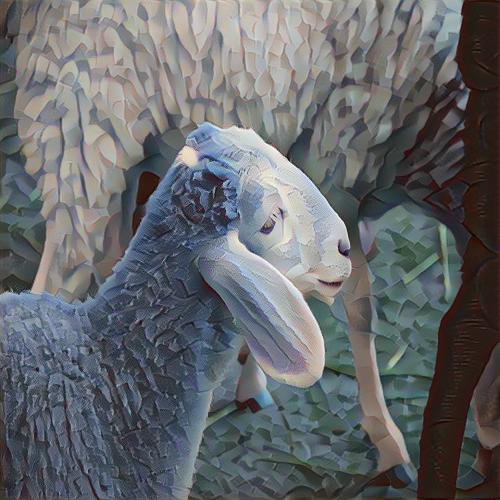

In [18]:
plt.imread(f"/content/{file_name}")